# Task 1:
  - 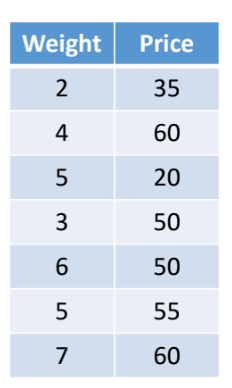
  - Your objective is to manually compute the slope (M) and y-intercept (C) using Ordinary Least Squares Linear Regression. Once determined, apply these values to predict the price when the vegetable weight is 6.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Creating dataframe

In [2]:
df = pd.DataFrame({
    "Weight":[2,4,5,3,6,5,7],
    "Price":[35,60,20,50,50,55,60]
})

In [3]:
df

,Weight,Price
0,2,35
1,4,60
2,5,20
3,3,50
4,6,50
5,5,55
6,7,60


### Null value checking

In [4]:
df.isnull().sum()

Weight    0
Price     0
dtype: int64

### initializing x and y

In [5]:
x = df['Weight']
x

0    2
1    4
2    5
3    3
4    6
5    5
6    7
Name: Weight, dtype: int64

In [6]:
y = df['Price']
y

0    35
1    60
2    20
3    50
4    50
5    55
6    60
Name: Price, dtype: int64

### - Slope/coefficient, m = Σ((x - x̄) * (y - ȳ)) / Σ((x - x̄)^2)
### - *Intercept*, c = ȳ - m * x̄

In [7]:
mean_x = np.mean(x)
mean_x

4.571428571428571

In [8]:
mean_y = np.mean(y)
mean_y

47.142857142857146

In [9]:
dev_x = x - mean_x
dev_y = y - mean_y

print(dev_x)
print(dev_y)

0   -2.571429
1   -0.571429
2    0.428571
3   -1.571429
4    1.428571
5    0.428571
6    2.428571
Name: Weight, dtype: float64
0   -12.142857
1    12.857143
2   -27.142857
3     2.857143
4     2.857143
5     7.857143
6    12.857143
Name: Price, dtype: float64


In [10]:
coefficient = np.sum(dev_x*dev_y) / np.sum(dev_x**2)
coefficient

2.620967741935484

In [11]:
intercept = mean_y - (coefficient * mean_x)
intercept

35.16129032258065

In [12]:
pred_y = (coefficient * 6 ) + intercept
pred_y

50.88709677419355

- ### Using sklearn

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
reg = LinearRegression()

training the model
  - x should be 2d
  - y can be 2d or 1d
  - x=df[['Weight']]
  - y = df['Price']

In [23]:
reg.fit(df[['Weight']],df['Price'])


LinearRegression()

In [26]:
coefficient2 = reg.coef_
print("coefficient from sklearn method ",coefficient2)
print("coefficient from raw equation" , coefficient)

coefficient from sklearn method  [2.62096774]
coefficient from raw equation 2.620967741935484


In [27]:
intercept2 = reg.intercept_

print("intercept from sklearn method " , intercept2)
print("intercept from raw equation " , intercept)

intercept from sklearn method  35.16129032258065
intercept from raw equation  35.16129032258065


In [28]:
pred_y2= (coefficient2 * 6  ) + intercept2

print("prediction of Price when wight = 6 using sklearn method " , pred_y2)
print("prediction of Price when wight = 6 using raw calculation " , pred_y2)

prediction of Price when wight = 6 using sklearn method  [50.88709677]
prediction of Price when wight = 6 using raw calculation  [50.88709677]


In [32]:
df['predictied Price using sklearn'] = (coefficient2 * df['Weight'])+intercept2
df

,Weight,Price,Predicted Price,Residual,predictied Price using sklearn,Predicted Price Using Raw calculation
0,2,35,40.403226,-5.403226,40.403226,40.403226
1,4,60,45.645161,14.354839,45.645161,45.645161
2,5,20,48.266129,-28.266129,48.266129,48.266129
3,3,50,43.024194,6.975806,43.024194,43.024194
4,6,50,50.887097,-0.887097,50.887097,50.887097
5,5,55,48.266129,6.733871,48.266129,48.266129
6,7,60,53.508065,6.491935,53.508065,53.508065


# Task 02:
- Compute the residuals for each data point.

- `Residual = Observed Value - Predicted Value`

In [31]:
df['Predicted Price Using Raw calculation'] = (coefficient * df['Weight']) + intercept

df

,Weight,Price,Predicted Price,Residual,predictied Price using sklearn,Predicted Price Using Raw calculation
0,2,35,40.403226,-5.403226,40.403226,40.403226
1,4,60,45.645161,14.354839,45.645161,45.645161
2,5,20,48.266129,-28.266129,48.266129,48.266129
3,3,50,43.024194,6.975806,43.024194,43.024194
4,6,50,50.887097,-0.887097,50.887097,50.887097
5,5,55,48.266129,6.733871,48.266129,48.266129
6,7,60,53.508065,6.491935,53.508065,53.508065


In [15]:
df['Residual'] = df['Price'] - df['Predicted Price']
df

,Weight,Price,Predicted Price,Residual
0,2,35,40.403226,-5.403226
1,4,60,45.645161,14.354839
2,5,20,48.266129,-28.266129
3,3,50,43.024194,6.975806
4,6,50,50.887097,-0.887097
5,5,55,48.266129,6.733871
6,7,60,53.508065,6.491935


# Task 03:
  - Calculate both the Mean Squared Error (MSE) and Mean Absolute Error (MAE).

- ### MSE

In [16]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df['Price'], df['Predicted Price'])
mse

167.30990783410135

- # MAE

In [17]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(df['Price'], df['Predicted Price'])
mae

9.87327188940092